<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-Function" data-toc-modified-id="Sigmoid-Function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sigmoid Function</a></span></li><li><span><a href="#Cost-Function" data-toc-modified-id="Cost-Function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cost Function</a></span></li><li><span><a href="#Optimize-cost-function-using-gradient-descent" data-toc-modified-id="Optimize-cost-function-using-gradient-descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Optimize cost function using gradient descent</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Test</a></span></li></ul></li></ul></div>

Author: Weicheng Zhang

Date: 09/14/2019

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression
## Sigmoid Function

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Cost Function

In [9]:
def costFunction(theta,X,y):
    h = sigmoid(np.dot(X,theta.T)) # Hypothesis function
    j = (np.dot((-y).T, np.log(h)) - np.dot((1-y).T, np.log(1-h)))/m # cost of entire data set
    return j

## Optimize cost function using gradient descent

In [10]:
def gradient(theta, X,y):
    h = sigmoid(np.dot(X,theta.T))
    return ((1/m) * np.dot(X.T,(h-y))) # First order derivative of cost function

from scipy import optimize
def optimizeTheta(theta, X,y):
    """
    Minimize cost function  using truncated Newton algorithm
    """
    result = optimize.fmin_tnc(func = costFunction, x0=theta, fprime = gradient, 
                            args=(X, y.flatten()))
    return result[0]

## Test

Text(0, 0.5, 'Exam 2 Score')

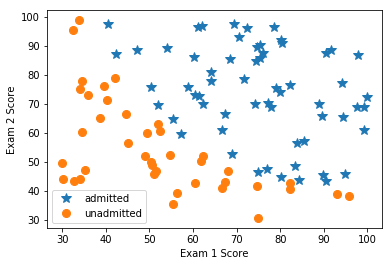

In [11]:
data = np.loadtxt("ex2data1.txt", delimiter = ',')
X,y = data[:,:-1], data[:,-1]
m,n = data.shape
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]
theta = np.zeros((1,n))

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

def plotData(X,y):
    fig = plt.figure()
    plt.plot(pos[:, 1], pos[:, 2], '*', ms=10, label = "admitted") # x=exam 1 score
    plt.plot(neg[:, 1], neg[:, 2], 'o',ms=8, label="unadmitted") # y = exam 2 score
    plt.legend()

plotData(X, y)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")

In [13]:
optimizedTheta = optimizeTheta(theta, X, y)
pred = sigmoid(np.dot(X, optimizedTheta.T)) >= 0.5
print("Accuracy is {}".format(np.sum(pred == y.flatten()) / m))

Accuracy is 0.89
